In [1]:
import numpy as np
originalGrid = np.array( [ list(map(int, line)) for line in open("puzzle15.txt").read().split("\n") ])
startingPosition = (0, 0); targetPosition = (499, 499)

In [21]:
from math import inf

def dijkstra(graph : list[list[int]], source : int, width : int = 100):
    
    def findMindDistNode(queue : list[int], distances : list[int]):
        ''' Need to update with a min heap'''
        minDist = min(queue, key=lambda x: distances[x])
        queue.remove(minDist)
        return minDist
    
    def length(nodeFrom : int, nodeTo : int):
        row, col = nodeTo // width, nodeTo % width
        return graph[row][col]

    dist = []
    prev = []
    Q = []

    for row in range(width):
        for col in range(width):
            dist.append(inf)
            prev.append(-1)
            Q.append(col + row * width)
    dist[0] = 0

    print("Distance list:", len(dist))
    print(dist[:10],"...", dist[-10:])
    print("Previous list:", len(prev))
    print(prev[:10],"...", prev[-10:])
    print("Queue:", len(Q))
    print(Q[:10],"...", Q[-10:])

    counter = len(Q)
    area = width * width
    while len(Q) > 0:
        if counter % 1000 == 0: print(counter)
        if counter % 10000 == 0:
            print("Distance list:", len(dist))
            print(dist[:10],"...", dist[-10:])
            print("Previous list:", len(prev))
            print(prev[:10],"...", prev[-10:])
            print("Queue:", len(Q))
            print(Q[:10],"...", Q[-10:])
        counter -= 1
        u = findMindDistNode(Q,dist)
        neighbours = []
        if u % width < width - 1: neighbours.append(u + 1)
        if u % width > 0: neighbours.append(u - 1)
        if u // width > 0: neighbours.append(u - width)
        if u // width < 99 and u < area - width: neighbours.append(u + width)
        for v in neighbours:
            alt = dist[u] + length(u, v)
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
    return dist, prev



In [16]:
grid = originalGrid.tolist()

In [17]:
distances, previous = dijkstra(grid, (0,0))

Distance list: 10000
[0, inf, inf, inf, inf, inf, inf, inf, inf, inf] ... [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Previous list: 10000
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1] ... [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Queue: 10000
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ... [9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999]
10000
9000
8000
7000
6000
5000
4000
3000
2000
1000


In [13]:
path = []
node = 100 * 100 - 1
steps = 0
while node > 0 and steps < 10000:
    path.append(node)
    node = previous[node]
    steps += 1
path.append(0)
sum([grid[x // 100][x % 100] for x in path]) - grid[0][0]

456

In [122]:
from PIL import Image
grayscale = [(int(255 - (x / 10) * 255),int(255 - (x / 10) * 255),int(255 - (x / 10) * 255), 255) for x in range(9)]
def drawGrid(grid : list[list[int]], path : list[tuple[int, int]] = None, width = 100) -> Image:
    gridImage = Image.new("RGBA", (len(grid[0]), len(grid)), (0,0,0,0))
    p = [grayscale[grid[row][col] - 1] for row in range(len(grid)) for col in range(len(grid[0]))]
    gridImage.putdata(p)
    if path != None:
        pathImage = Image.new("RGBA", gridImage.size, (0,0,0,0))
        p = []
        for row in range(len(grid)):
            for col in range(len(grid[0])):
                if row * width + col in path:
                    p.append((255,0,0,255))
                else:
                    p.append((0,0,0,0))
        pathImage.putdata(p)
        gridImage = Image.alpha_composite(gridImage, pathImage)


    return gridImage.resize((gridImage.width * 4, gridImage.height * 4), Image.NEAREST)


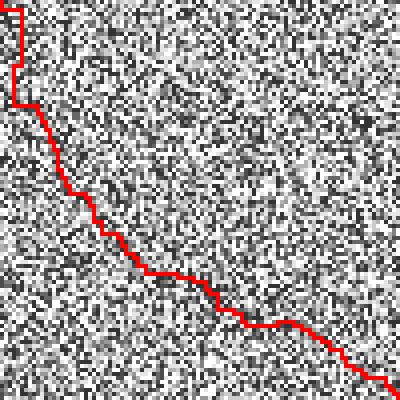

In [123]:
img = drawGrid(grid, path)
img.save("day152part1path.png")
img

In [18]:
largerGrid = None
for i in range(5):
    largerRow = None
    for j in range(5):
        increment = i + j
        newTile = np.where((originalGrid + increment) < 10 , originalGrid + increment, (originalGrid + increment) - 9)
        if largerRow is None: largerRow = newTile
        else: largerRow = np.concatenate((largerRow, newTile), axis = 1)
    if largerGrid is None: largerGrid = largerRow
    else: largerGrid = np.concatenate((largerGrid, largerRow), axis = 0)
largerGrid

array([[5, 9, 6, ..., 1, 2, 3],
       [5, 5, 7, ..., 8, 8, 5],
       [3, 1, 7, ..., 8, 7, 5],
       ...,
       [2, 9, 5, ..., 1, 9, 5],
       [3, 1, 2, ..., 4, 2, 1],
       [3, 5, 6, ..., 4, 1, 2]])

In [19]:
grid = largerGrid.tolist()

In [22]:
distances2, previous2 = dijkstra(grid, (0,0), width=500)

Distance list: 250000
[0, inf, inf, inf, inf, inf, inf, inf, inf, inf] ... [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Previous list: 250000
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1] ... [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Queue: 250000
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ... [249990, 249991, 249992, 249993, 249994, 249995, 249996, 249997, 249998, 249999]
250000
Distance list: 250000
[0, inf, inf, inf, inf, inf, inf, inf, inf, inf] ... [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Previous list: 250000
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1] ... [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Queue: 250000
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ... [249990, 249991, 249992, 249993, 249994, 249995, 249996, 249997, 249998, 249999]
249000
248000
247000
246000
245000
244000
243000
242000
241000
240000
Distance list: 250000
[0, 9, 15, 20, 24, 27, 28, 30, 39, 44] ... [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Previous list: 250000
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8] ... [-1, -1, -1, -1, -1, 

KeyboardInterrupt: 

In [128]:
path2 = []
node = 500 * 500 - 1
steps = 0
while node > 0 and steps < 250000:
    path2.append(node)
    node = previous2[node]
    steps += 1
path2.append(0)
print(previous2)

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 510, 511, 11, 12, 13, 14, 15, 517, 518, 519, 520, 20, 522, 22, 524, 525, 526, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 545, 546, 547, 47, 48, 49, 50, 51, 52, 53, 54, 556, 56, 57, 58, 59, 561, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 574, 74, 576, 76, 79, 579, 79, 581, 582, 82, 83, 84, 586, 88, 588, 88, 590, 591, 592, 92, 594, 94, 95, 597, 598, 599, 600, 100, 101, 603, 103, 605, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 617, 618, 118, 620, 120, 622, 122, 624, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 637, 137, 639, 640, 641, 642, 142, 644, 144, 145, 647, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 660, 661, 662, 663, 664, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 677, 177, 178, 179, 180, 181, 182, 684, 685, 686, 687, 688, 188, 189, 190, 692, 192, 193, 194, 195, 196, 197, 699, 700, 200, 201, 703, 704, 705, 205, 206, 708, 709, 710, 711, 211, 212, 213, 715,

In [141]:
sum([grid[x // 100][x % 100] for x in path2]) - grid[0][0]

IndexError: list index out of range

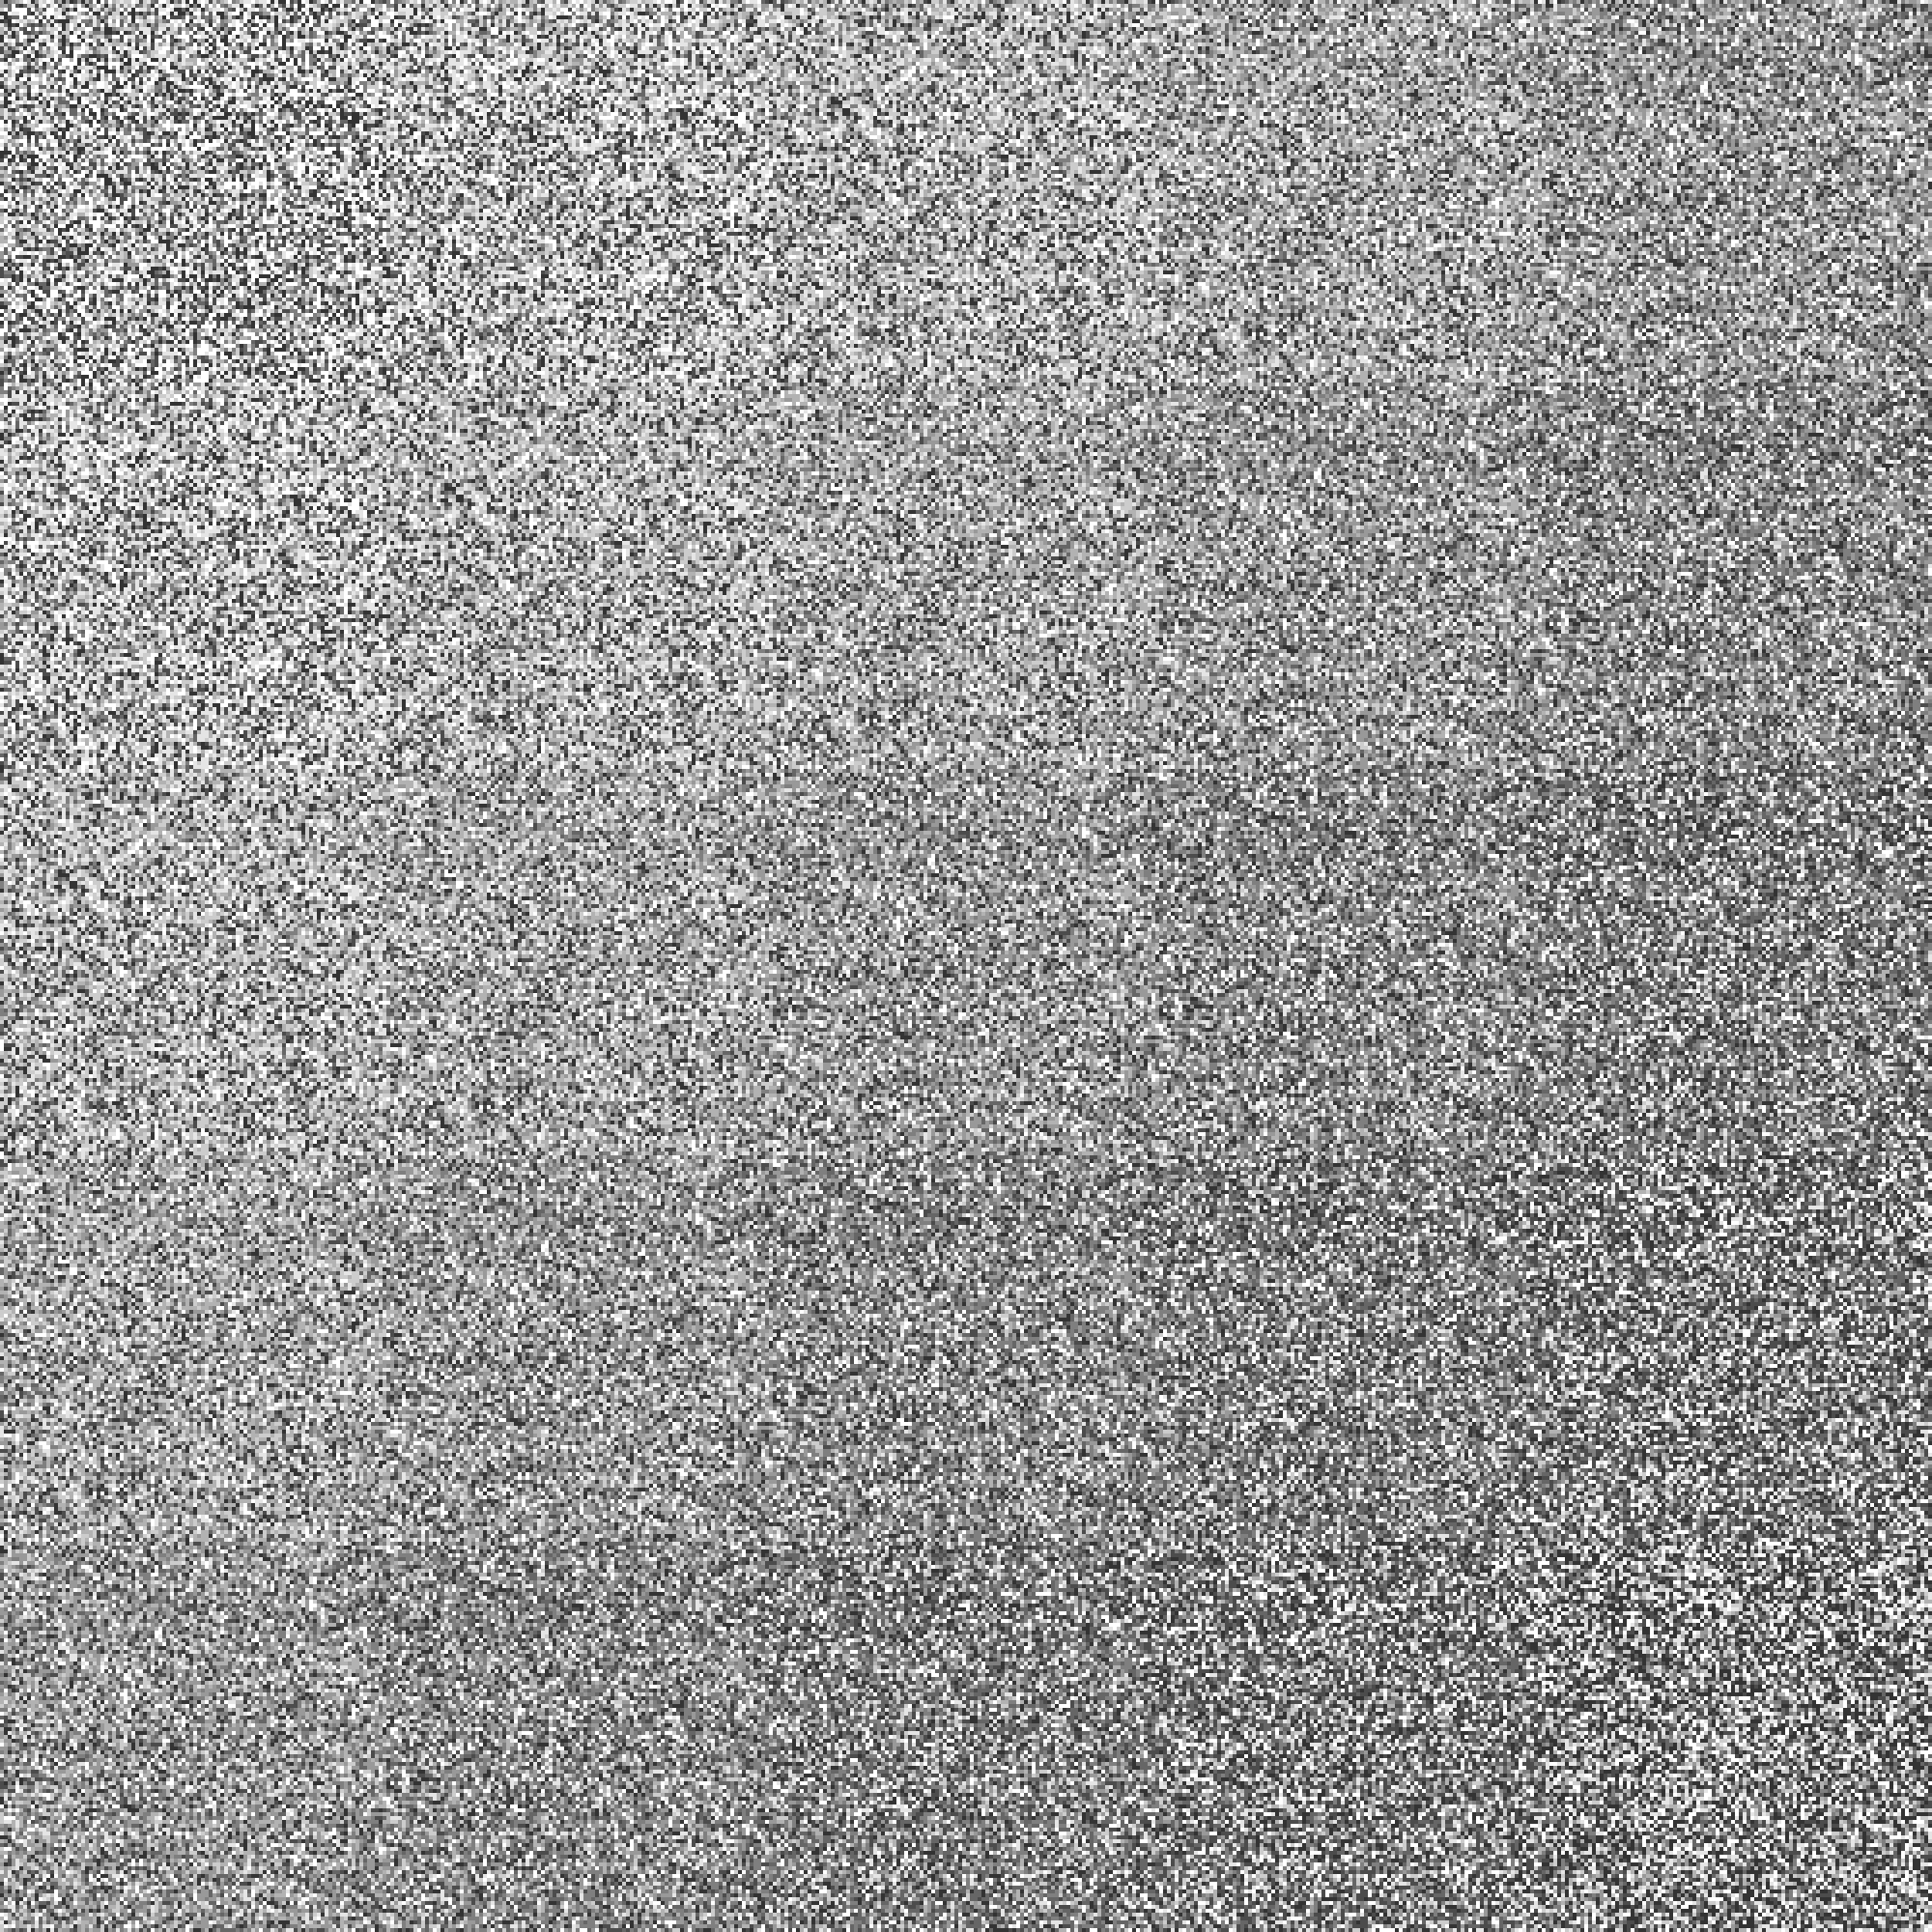

In [114]:
img = drawGrid(largerGrid.tolist(), path2, 500)
img.save("day15part2path.png")
img

[26, 20]

In [23]:
distances2

NameError: name 'distances2' is not defined